### load predictions from log

In [5]:
# plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

params = {
   'axes.labelsize': 12,
   'text.fontsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   }
mpl.rcParams.update(params)
sns.set_style("whitegrid")
sns.despine()

/home/roseyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
#06-15-17-17-24-40
#05-17-17-16-17-44
#06-15-17-17-24-40
#08-22-17-00-24-10
#08-30-17-23-53-05
time_stamp ="09-18-17-11-56-02"
exp='lorenz'
models =["LSTM"] #phased_lstm
hz_list= [128]
lr_list =[2]
steps =  [20, 40, 60, 80, 100]


import numpy as np
def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d
def load_log(st, model):
    data_path = "/var/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"st_"+str(st)+"/"
    f_pred= "predict.npy"
    f_err = "config.out"
    pred =  np.load(data_path+f_pred )
    with open(data_path+"/"+f_err,'r') as fstream:
        config = read_config(fstream)
    return config, pred

def reshape_pred(y):
    y = np.squeeze(y)
    n_dim = np.shape(y)[-1]
    y = np.reshape(y, [-1, n_dim])
#     print('y shape', np.shape(y))
    return y

def get_best_pred(model):
    err_best = 1e6
    i=0
    for model in models:
        j=0
        for st in steps:
#             print('load model {:s}, hidden size {:d}, learning rate 1e-{:d}'.format(model, hz, lr))
            try:
                config, pred = load_log(st, model)
    #             print('train error:',config['train_error'],'valid error:',config['valid_error'],'test err:',config['test_error'])
                err =  config['test_error']
            except FileNotFoundError:
                'log does not exits'
                err = 1e3
            # save the best results so far
            if err < err_best:
                err_best = err
                pred_best = pred     
            j+=1
        i+=1
    y_true, y_pred = pred_best
    y_true = reshape_pred(y_true)
    y_pred = reshape_pred(y_pred)
    return (y_true, y_pred)



pred_rnn = get_best_pred('RNN')
pred_lstm = get_best_pred('LSTM')
pred_mrnn = get_best_pred('MRNN')


### visualize the time series prediction

y true shape (9600, 30) y_pred shape (9600, 30)


(0, 1)

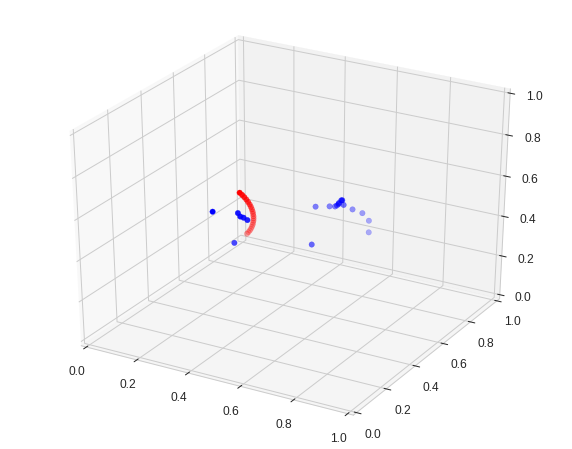

In [21]:
# load the prediction
%matplotlib inline
y_true, y_pred = pred_lstm

print('y true shape', y_true.shape, 'y_pred shape', y_pred.shape)


T= 20
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

# ax.plot(y_true[:T,0], y_true[:T,1], y_true[:T,2], 'r--')
ax.scatter(y_true[:T,0], y_true[:T,1], y_true[:T,2], c='r', s=30)
ax.scatter(y_pred[:T,0], y_pred[:T,1], y_pred[:T,2], c='b', s=30)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_zlim((0,1))
# fig.savefig('lorenz_lt_trnn.png')
# plot_lorenz(y_true,100)

### visualize and evaluate prediction 

In [7]:
import numpy as np

def nd(y_pred, y_true):
    """normalized deviation"""
    t1 = np.sum(abs(y_pred-y_true))/ np.size(y_true)
    t2 = np.sum(abs(y_true))/np.size(y_true)
    return t1/t2
    
def nrmse(y_pred, y_true):
    """normalized RMSE"""
    t1 = np.linalg.norm(y_pred-y_true)**2 / np.size(y_true)
    t2 = np.sum(abs(y_true))/np.size(y_true)
    return np.sqrt(t1) / (t2)

def rmse(y_pred, y_true):
    """RMSE"""
    t1 = np.linalg.norm(y_pred-y_true)**2 / np.size(y_true)
    return np.sqrt(t1)

def eval_forecast(pred):
    y_true, y_pred = pred
#     print('y true shape', y_true.shape, 'y_pred shape', y_pred.shape)


    print('ND', nd(y_pred, y_true))
    print('NRMSE',nrmse(y_pred, y_true))
    print('RMSE', rmse(y_pred, y_true))
    return y_true, y_pred

# eval_forecast(pred_rnn)
# eval_forecast(pred_lstm)
# eval_forecast(pred_mrnn)
# eval_forecast(pred_trnn)
y_true, y_pred = eval_forecast(pred_trnn)

ND 0.376402641859
NRMSE 0.539556852247
RMSE 0.275052472833


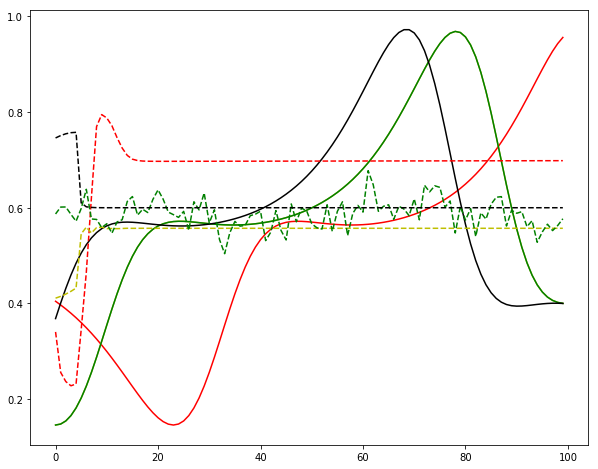

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

y_true, y_pred = pred_lstm
y_true2, y_pred2 = pred_trnn
y_true3, y_pred3 = pred_rnn
y_true4, y_pred4 = pred_mrnn
fig = plt.figure(figsize=(10,8))
plt.plot(y_true[0:100,1],'r')
plt.plot(y_true2[0:100,1],'y')
plt.plot(y_true3[0:100,1],'g')
plt.plot(y_true4[0:100,1],'k')
plt.plot(y_pred[0:100,1],'r--')
plt.plot(y_pred2[0:100,1],'y--')
plt.plot(y_pred3[0:100,1],'g--')
plt.plot(y_pred4[0:100,1],'k--')v
# fig.savefig('traffic_uci_trnn.png')

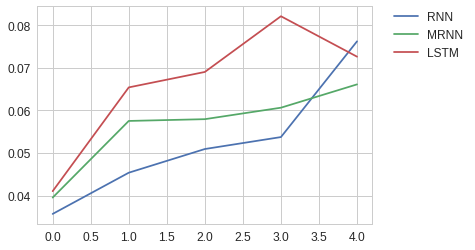

In [8]:
import numpy as np
rnn = np.load('../result/rnn_lorenz.npy')
mrnn = np.load('../result/mrnn_lorenz.npy')
lstm = np.load('../result/lstm_lorenz.npy')
plt.plot(rnn, label= "RNN")
plt.plot(mrnn, label="MRNN")
plt.plot(lstm, label="LSTM")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
